In [11]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
import math
import statistics

In [12]:
#Jasmine's work
fname= 'ASTR19_S22_group_project_data.txt'
f = open(fname,'r')
#print(f.name)
test_data = f.readlines()
f.close()
#print(test_data)
del test_data[0:3]
#print(test_data)

MIN = []
HRS = []
HEIGHT = []
DAYS = []
TIME = []

for i in range(0,len(test_data)):
    a = test_data[i]
    #print(a)
    a = a.split()
    b = a[1]
    b= b.split(':')
    #print(a)
    #print(b)
    DAYS.append(float(a[0]))       #appends at the end of the list DAYS
    HRS.append(float(b[0]))
    MIN.append(float(b[1]))
    #print(DAYS)
    #print(HRS)
    #print(MIN)
    HEIGHT.append(float(a[2]))
    #print(HEIGHT)
    #The time in hours is equal to the ((HRS + (MIN/60))+24(DAYS-1))
    #DAYS is the number of days passed
    y = (HRS[i] + (MIN[i]/60))+ 24.0*((DAYS[i])-1.0)
    TIME.append(y)
    #print(TIME)
HEIGHT = np.array(HEIGHT)
TIME = np.array(TIME)
#print(type(TIME),type(HEIGHT))

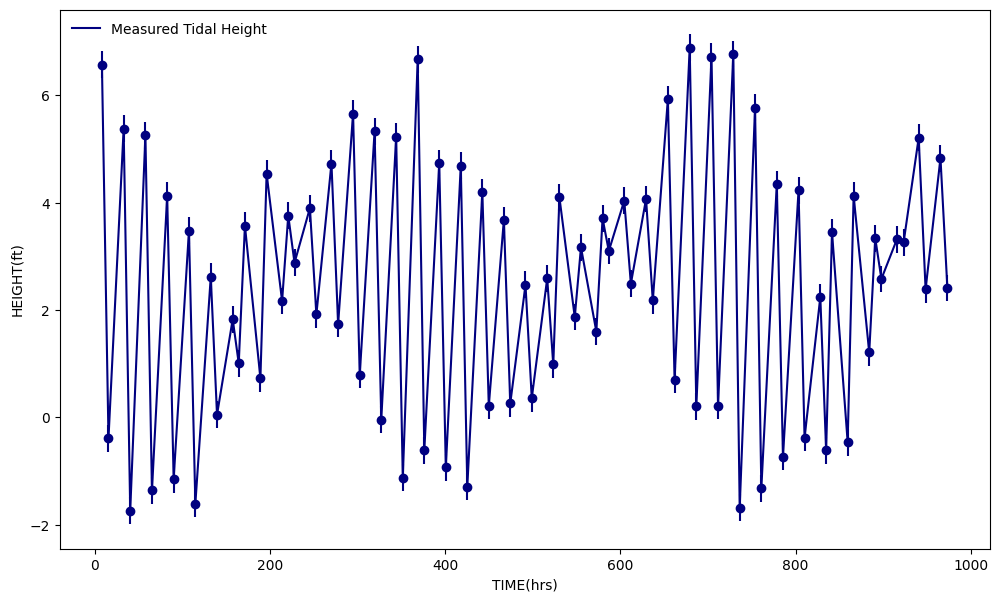

In [114]:
#Jasmine's stuff
f, ax = plt.subplots(1,1,figsize=(12,7))
fig = plt.figure
plt.plot(TIME,HEIGHT, c = "navy", linestyle = "solid", label= 'Measured Tidal Height')
#plt.scatter(TIME,HEIGHT,c="red")
plt.xlabel('TIME(hrs)')
plt.ylabel('HEIGHT(ft)')

#add error bar of 0.25
yerr= np.full(len(TIME),0.25)
plt.errorbar(TIME,HEIGHT,yerr=yerr,fmt='o',c = "navy")

#add the legend
#create a legend without a frame in the upper left corner
ax.legend(loc='upper left',frameon=False)
plt.savefig('Tidal data.pdf',bbox_inches='tight',dpi=400)

# The Model
Our model is the product of 2 sinusoidal curves
The first sinusoid models the change in tides every 12 hrs corresponding to a frequency of ~ 0.506. 
In addition, we observe a periodic change in the maximum and minimum tide heights. In other words, the amplitude is also changing periodically and that can be represented with another sinusoidal function. From the plotted data, we can see that the amplitude seems to show a periodic variation every 360 hours exhibiting a frequency of around 0.018
The function is represented by:
# A0 + A1cos(w1t + p1) (1 + A2cos(w2t + p2))
Where the multiple As represent amplitude, the Ws represent frequency, and the Ps represent phaseshifts

In [73]:
def osc_curve_func(x, A0, A1, A2, w1, w2, p1, p2):
    return A0 + A1*np.cos(w1*x + p1) *(1 + A2*np.cos(w2*x + p2))

In [136]:
def LOSS_func(y_actual,y_predicted):
    MSE = np.square(np.subtract(y_actual, y_predicted)).mean()
    RMSE= math.sqrt(MSE)
    print('Root Mean Square Error =', RMSE)
    return (RMSE)

In [137]:
# Make some initial guesses for the function parameters
# Init guess that worked [2, 2, 2, 0.506, 0.018, 4.048, 0.144]
A0_init = 2.0
A1_init = 2.0
A2_init = 2.0
w1_init = 0.506
w2_init = 0.018
p1_init = 4.048
p2_init = 0.144

param_init = [A0_init, A1_init, A2_init, w1_init, w2_init, p1_init, p2_init]

#perform the fit
#final guesses: [ 2.44029062 -2.30491622  0.62643826  0.50668844  0.01812629  4.56443412, -0.58796095]
# we give the curve fit the data, the form of the function it has to fit, along with our intial parameter guesses
# curve fit tunes the parameters in a way that reduces the loss function, the RMSE error and returns the best fit 

params, params_cov = optimize.curve_fit(osc_curve_func,TIME,HEIGHT,sigma=yerr,p0=param_init)
A0_fin = params[0]
A1_fin = params[1]
A2_fin = params[2]
w1_fin = params[3]
w2_fin = params[4]
p1_fin = params[5]
p2_fin = params[6]

print(params)
print(param_init)
predicted_HEIGHT= osc_curve_func(TIME, A0_fin, A1_fin, A2_fin, w1_fin, w2_fin, p1_fin, p2_fin)

loss = LOSS_func(HEIGHT, predicted_HEIGHT)
print(loss)

[ 2.44029062 -2.30491622  0.62643826  0.50668844  0.01812629  4.56443412
 -0.58796095]
[2.0, 2.0, 2.0, 0.506, 0.018, 4.048, 0.144]
Root Mean Square Error = 0.8461492800127624
0.8461492800127624


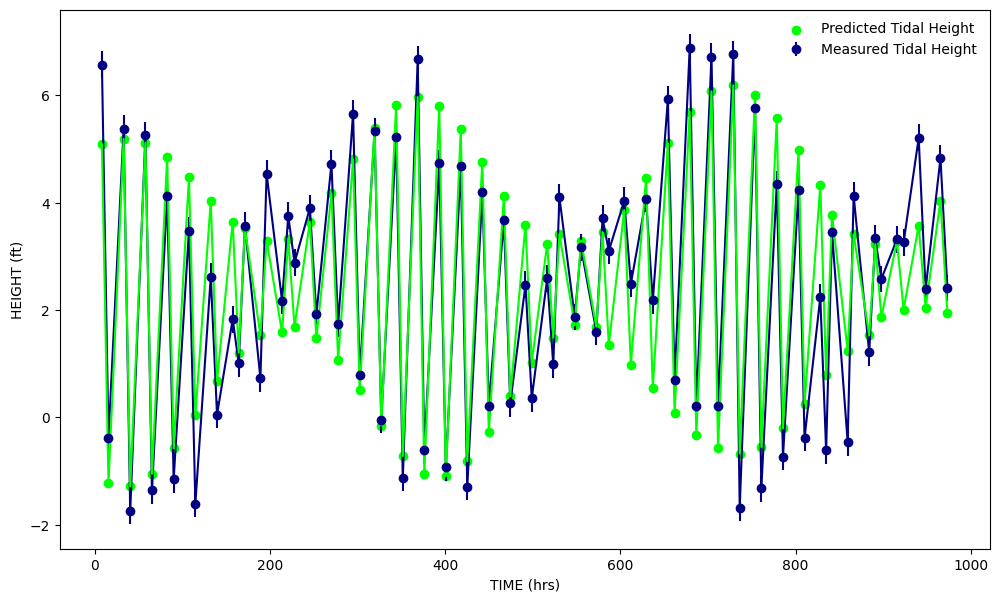

In [115]:
f, ax = plt.subplots(1,1,figsize=(12,7))
fig = plt.figure


#add error bar of 0.25
yerr= np.full(len(TIME),0.25)
plt.errorbar(TIME,HEIGHT,yerr=yerr,fmt='o',c = "navy",label = 'Measured Tidal Height')
plt.plot(TIME,HEIGHT, c = "navy", linestyle = "solid")
plt.xlabel('TIME (hrs)')
plt.ylabel('HEIGHT (ft)')

plt.plot(TIME,predicted_HEIGHT, c= 'lime')
plt.scatter(TIME,predicted_HEIGHT, c= 'lime', label = 'Predicted Tidal Height')

#add the legend in the upper right corner
ax.legend(loc='upper right',frameon=False)
plt.savefig('Actual vs Predicted Tidal heights.pdf',bbox_inches='tight',dpi=400)

In [116]:
residuals = np.subtract(HEIGHT,predicted_HEIGHT)
print(type(residuals))

<class 'numpy.ndarray'>


The Mean of the residuals is -0.000 ft
The Median of the residuals is 0.076 ft
The Standard Deviation in the residuals (scatter in the data) is 0.846 ft
The Standard Measurement error is 0.25 ft
The scatter in the data is thus larger than the measurement error
The intrinsic scatter in the data is = 0.808


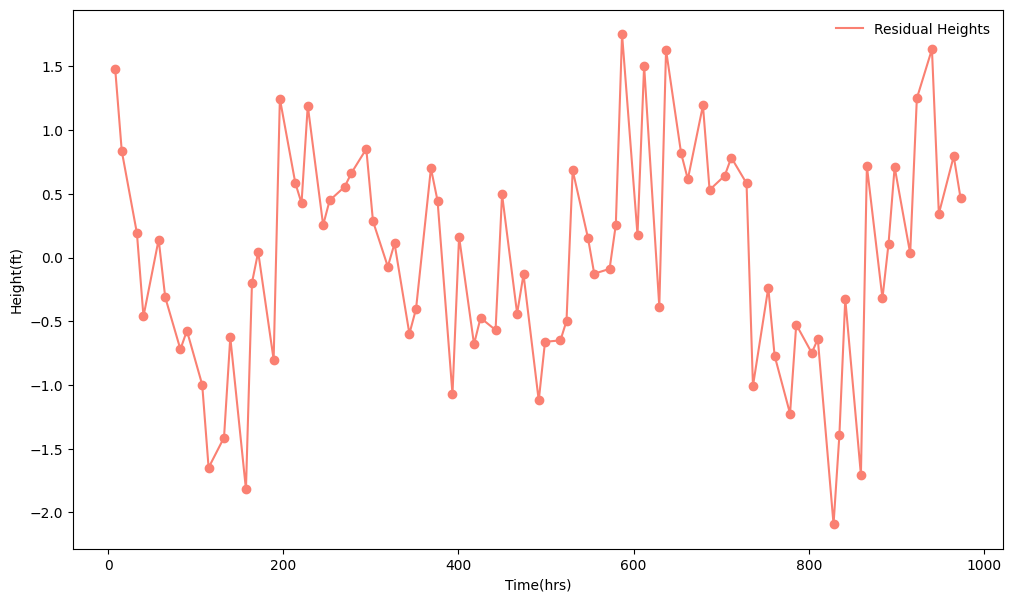

In [122]:
f, ax = plt.subplots(1,1,figsize=(12,7))
ax.errorbar(TIME,residuals,fmt= 'o', c= 'Salmon')
plt.plot(TIME,residuals, c="Salmon", label = 'Residual Heights')
plt.xlabel('Time(hrs)')
plt.ylabel('Height(ft)')

#add the legend in the upper right corner
ax.legend(loc='upper right',frameon=False)

print(f'The Mean of the residuals is {np.mean(residuals):4.3f} ft')
print(f'The Median of the residuals is {np.median(residuals):4.3f} ft')
print(f'The Standard Deviation in the residuals (scatter in the data) is {np.std(residuals):4.3f} ft')
print('The Standard Measurement error is 0.25 ft')
print('The scatter in the data is thus larger than the measurement error')

a = (np.std(residuals)**2)-(0.0625)
print(f'The intrinsic scatter in the data is = {math.sqrt(a):4.3f}')

In [125]:
#Jasmine's work
def histogram_plot(x,
                   flag_save = True, #save the figure?
                   xlabel='Residual values', #x-axis label
                   ylabel='N of events in the bin', #y-axis label
                   lcolor='salmon', #line color
                   fs=14, #font size
                   fname='histogram_plot.pdf'): #default plot filename

                   #label the bins
                   width = 0.3
                   histmin = np.floor(min(x))
                   histmax = np.ceil(max(x))+width
                   bins = np.arange(histmin, histmax, width)
                   f, ax = plt.subplots(1,1,figsize=(6,6))
                   
                   #plot y vs. x
                   ax.hist(x,facecolor=lcolor,bins=bins,edgecolor='black',alpha=1.0, label = 'Residuals')
                   #define a figure and axis
                   ax.set_xlabel(xlabel,fontsize=fs)
                   ax.set_ylabel(ylabel,fontsize=fs)
                   
                   ax.legend(loc='upper right',frameon=False)
                   #save the plot?
                   if(flag_save):
                       plt.savefig('histogram_plot.pdf', bbox_inches='tight',dpi=400)

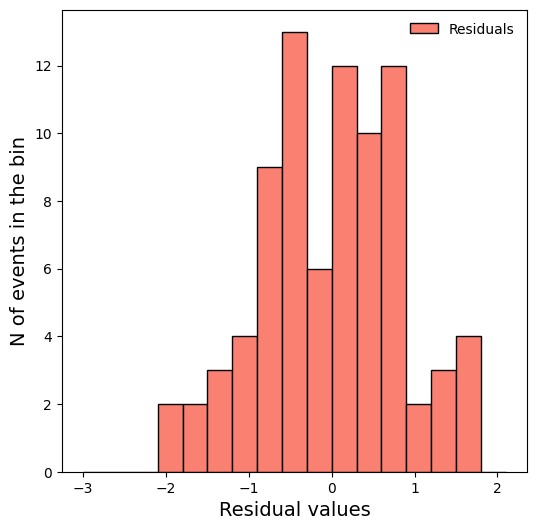

In [126]:
histogram_plot(residuals)

In [123]:
def hist_double_plot(x,u,
                     flag_save = True, #save the figure?
                     xlabel='Residual values', #x-axis label
                     ylabel='N of events in the bin', #y-axis label
                     lcolor='salmon', #line color
                     fs=14, #font size
                     fname='histogram_plot.pdf'): #default plot filename

                     #label the bins
                     width = 0.3
                     histmin = np.floor(min(min(x),min(u)))
                     histmax = np.ceil(max(max(x),max(u)))+width
                     bins = np.arange(histmin, histmax, width)
                     f, ax = plt.subplots(1,1,figsize=(6,6))
                   
                     #plot histogram of x
                     ax.hist(x,facecolor=lcolor,bins=bins,edgecolor='black',alpha=1, label = 'Residuals')
                     #plot histogram of u
                     ax.hist(u,facecolor='black',bins=bins,edgecolor='black',alpha=1, label = 'Outlier')
                    
                     #define a figure and axis
                     ax.set_xlabel(xlabel,fontsize=fs)
                     ax.set_ylabel(ylabel,fontsize=fs)
                   
                     ax.legend(loc='upper right',frameon=False)
                     #save the plot?
                     if(flag_save):
                         plt.savefig('hist_double_plot.pdf', bbox_inches='tight',dpi=400)

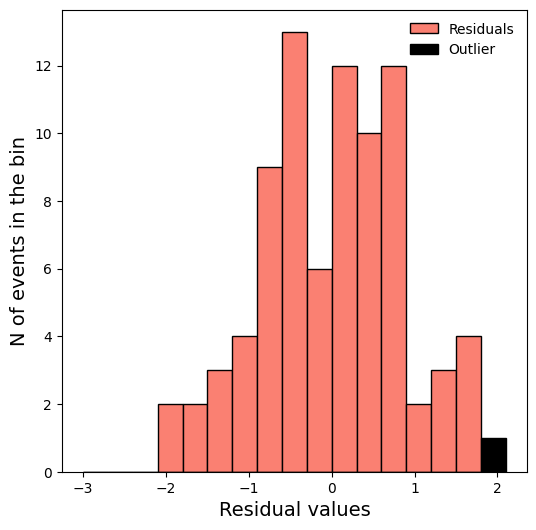

In [124]:
outlier = [2.0]
hist_double_plot(residuals,outlier)

In [134]:
# Jasmine's work
#How large of a deviation is this tsunami, in terms of standard deviations of the distribution of normal tides from the model?
std_devs_away = (outlier[0]/np.std(residuals))
print (f'The tsunami is {std_devs_away:4.3f} standard deviations away from the distribution of normal tides')

The tsunami is 2.364 standard deviations away from the distribution of normal tides
